In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)
from ast import literal_eval


In [2]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [3]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - Virus Host DB mapping

In [4]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_vertebrates_w_seq_wo_multi_host_seq.csv")

In [5]:
df = pd.read_csv(input_file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [6]:
print("df size = ", df.shape)
df.head()

df size =  (397278, 9)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank,seq,seq_len
0,UniRef90_A0A023HI16,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MLPLETIGAIIALVIAGIIAIVVWTIVYIEYRKLLRQKKIDRLIDR...,82
1,UniRef90_A0A023HI18,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MRVKGIRKNCPHLWRWGTMLLGMLMICSAAEQLWVTVYYGVPVWKE...,851
2,UniRef90_A0A023HIB6,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,MEPVDPNLEPWNHPGSKPTTACSKCYCKKCCWHCQLCFLKKGLGIS...,101
3,UniRef90_A0A023HQ48,28875,9534,Rotavirus A,species,Chlorocebus aethiops,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_A0A023I5A1,11676,9606,Human immunodeficiency virus 1,species,Homo sapiens,species,TVKIGGQLKEALLDTGADDTVLEDINLPGKWKPKMIGGIGGFIKVK...,319


In [40]:
df.dtypes

uniref90_id              object
tax_id                    int64
host_tax_ids              int64
virus_name               object
virus_taxon_rank         object
virus_host_name          object
virus_host_taxon_rank    object
dtype: object

In [61]:
agg_df = df[["virus_name", "virus_host_name", "uniref90_id"]].groupby(["virus_name", "virus_host_name"]).count().reset_index().sort_values("uniref90_id", ascending=False)

In [62]:
agg_df.shape

(1583, 3)

In [63]:
agg_df.head()

,virus_name,virus_host_name,uniref90_id
667,Human immunodeficiency virus 1,Homo sapiens,319333
634,Hepacivirus hominis,Homo sapiens,18589
637,Hepatitis B virus,Homo sapiens,13935
638,Hepatitis B virus,Pan troglodytes,13935
811,Microviridae sp.,Bos taurus,4772


In [64]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species_vertebrates_virushostcounts.csv")

In [65]:
agg_df.to_csv(output_file_path, index=False)

min host_tax_ids_count = 1
max host_tax_ids_count = 41


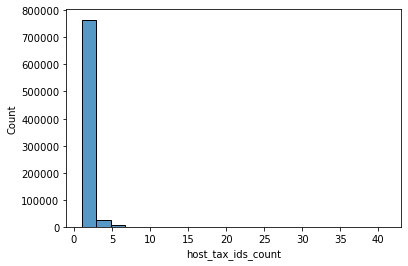

In [29]:
sns.histplot(df["host_tax_ids_count"])
print(f"min host_tax_ids_count = {min(df['host_tax_ids_count'])}")
print(f"max host_tax_ids_count = {max(df['host_tax_ids_count'])}")
plt.show()

In [35]:
df[df["host_tax_ids_count"] == 1].shape

(724694, 4)

In [7]:
column_stats(df, "virus_name")

Number of unique values = 1291
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            319333           80.380238
1                                   Hepacivirus hominis             18589            4.679091
2                                     Hepatitis B virus             13935            3.507619
3                                      Microviridae sp.              4772            1.201174
4                                        Microvirus sp.              3022            0.760676
5                          Human immunodeficiency virus              2297            0.578185
6                         Simian immunodeficiency virus              2053            0.516767
7                        Human immunodeficiency virus 2              1599            0.402489
8                                  Cressdnaviricota sp.              1573            0.395944
9                            

In [9]:
column_stats(df, "virus_host_name")

Number of unique values = 295
                 virus_host_name  virus_host_name_count  virus_host_name_percent
0                   Homo sapiens                 357987                90.109948
1                Pan troglodytes                  14748                 3.712262
2           Chlorocebus aethiops                   6932                 1.744874
3                  Gallus gallus                   1847                 0.464914
4                 Paguma larvata                   1573                 0.395944
5                     Sus scrofa                   1287                 0.323955
6                    Felis catus                    748                 0.188281
7      Hydrochoerus hydrochaeris                    723                 0.181988
8                     Bos taurus                    710                 0.178716
9                   Equus asinus                    400                 0.100685
10                  Mus musculus                    400                 0.10068

min seq len = 11
max seq len = 8249


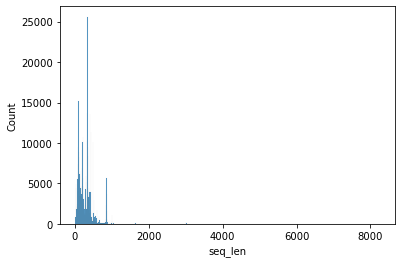

     start     end   count  percentage
0     11.0   697.5  371498   93.510841
1    697.5  1384.0   23989    6.038341
2   1384.0  2070.5     512    0.128877
3   2070.5  2757.0     487    0.122584
4   2757.0  3443.5     686    0.172675
5   3443.5  4130.0      37    0.009313
6   4130.0  4816.5      20    0.005034
7   4816.5  5503.0       3    0.000755
8   5503.0  6189.5       3    0.000755
9   6189.5  6876.0      21    0.005286
10  6876.0  7562.5      15    0.003776
11  7562.5  8249.0       7    0.001762


In [10]:
print_seq_len_histogram(df, n_bins=12)

In [23]:
count_df = df[["virus_name", "virus_host_name", "uniref90_id"]].groupby(["virus_name", "virus_host_name"]).count().reset_index()

In [25]:
count_df.sort_values("uniref90_id", ascending=False)

,virus_name,virus_host_name,uniref90_id
667,Human immunodeficiency virus 1,Homo sapiens,319333
634,Hepacivirus hominis,Homo sapiens,18589
637,Hepatitis B virus,Homo sapiens,13935
638,Hepatitis B virus,Pan troglodytes,13935
811,Microviridae sp.,Bos taurus,4772
812,Microviridae sp.,Homo sapiens,4772
894,Microvirus sp.,Homo sapiens,3022
666,Human immunodeficiency virus,Homo sapiens,2297
1269,Simian immunodeficiency virus,Pan troglodytes,2053
1268,Simian immunodeficiency virus,Chlorocebus aethiops,2053
